# Chapter 3: Linear Regression

Linear regression is a useful tool for predicting a quantitative number.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import cm
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


Advertising dataset

In [3]:
#data = pd.read_csv('/Users/rachan/Desktop/Por/Year4/Sem2/Stat Infer/ISLR_data/Advertising.csv', index_col = False)
data = pd.read_csv('/content/gdrive/MyDrive/ISLR_data/Advertising.csv')

In [4]:
data = data[data.columns[1:]]
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Text(0, 0.5, 'Sales')

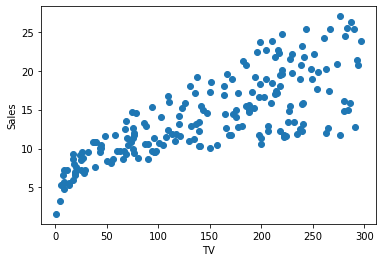

In [6]:
plt.scatter(data['TV'], data['sales'])
plt.xlabel('TV')
plt.ylabel('Sales')

# Simple linear regression

เป็นวิธีการประมาณ response y โดยใช้ predictor X โดยสมมติให้ความสัมพันธ์ระหว่าง predictor และ response เป็น linear 


$$ y = \beta_0 + \beta_1X $$

ทำการ regress y on X, regress y onto X 

โดย $\beta_0$ คือ intercept และ $\beta_1$ คือ slope ของเส้นตรง  โดยตัวแปรเหล่านี้เรียกว่า model coefficients หรือ model parameters \

หลังจากทำการ fit model บน training dataset แล้วจะได้ค่า $\hat{\beta_0}, \hat{\beta_1}$ ซึ่งเป็นค่า coefficient ที่ถูกประมาณ เพื่อที่จะใช้ในการทำนายค่า $\hat{y}$ ต่อไป
$$ \hat{y} = \hat{\beta_0} + \hat{\beta_1}X $$


* วิธีการประมาณค่า coefficient ของ model \
  จะทำโดยการหาค่า $\beta$ ที่ทำให้ $\|y-\hat{y}\|_2^2 = \|y-X\hat{\beta}\|_2^2 = \|e\|_2^2$ มีค่าน้อยที่สุด ซึ่งค่า $y-\hat{y}$ ก็คือค่า residual ของแบบจำลอง และ $\|e\|_2^2$ เรียกว่า Residual Sum Squares (RSS) \
  เนื่องจาก norm เป็น convex function ดังนั้น $\|y-X\hat{\beta}\|_2^2$ จะมีจุดต่ำสุดที่จุดเดียว จุดใช้วิธีการจับ gradient เทียบ β ให้มีค่าเท่ากับ 0 ซึ่งจะได้ 

$$ \hat{β} = (X^TX)^{-1}X^Ty $$



In [7]:
x_new = data['newspaper']
x_new = sm.add_constant(x_new)
model_new = sm.OLS(data['sales'], x_new)
result_new = model_new.fit()
print(result_new.summary())

x_rad = data['radio']
x_rad = sm.add_constant(x_rad)
model_rad = sm.OLS(data['sales'], x_rad)
result_rad = model_rad.fit()
print(result_rad.summary())

x_tv = data['TV']
x_tv = sm.add_constant(x_tv)
model_tv = sm.OLS(data['sales'], x_tv)
result_tv = model_tv.fit()
print(result_tv.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Thu, 09 Mar 2023   Prob (F-statistic):            0.00115
Time:                        17:19:58   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3514      0.621     19.876      0.0

* $\textbf{Hypothesis Test on the coefficient (testing null hypothesis)}$ \
$H_0$ คือสมมติฐานที่บอกว่าไม่มีความสัมพันธ์ระหว่าง X และ Y \
$H_1$ คือสมมติฐานที่บอกว่ามีความสัมพันธ์ระหว่าง X และ Y \
\
$\text{Mathematically, this is corresponding to testing }$
$$H_0: \beta_1 = 0 \text{ vs } H_1: \beta_1 \neq 0 $$
\
เราจะทดสอบโดยการตรวจสอบว่า $\hat{\beta}_1$ นั้นมีค่าที่ไกลกว่า 0 อย่าง significant โดยเราะพิจารณาจากค่า standard error ของ $\hat{\beta}, SE(\hat{\beta})$ (standard error อย่างคร่าวๆ คือค่าที่บอกว่าค่า $\hat{\beta}$ ที่ประมาณมาได้นั้นคลาดเคลื่อนโดยเฉลี่ยจากค่าจริงเท่าไหร่) ดังนั้นเมื่อค่า $SE(\hat{\beta})$ มีค่าน้อยทำให้ แม้แต่ค่าของ $\hat{\beta}$ ที่มีค่าน้อยก็ยังทำให้ $ \beta_1 \neq 0$ [เมื่อค่า standard error มีค่าน้อยแสดงว่าค่าที่ประมาณออกมาได้มีความคลาดเคลื่อนน้อย ดังนั้นแม้แต่ค่าของ $\beta_1$ ที่มีค่าน้อยก็อาจมีความสำคัญ] โดยจะใช้ค่า 
$$ t-statistic: t = \frac{\hat{\beta_1}-0}{SE(\hat{\beta_1})} $$
เป็นตัวบ่งชี้ว่าค่า $\hat{\beta}$ นั้นมีค่าที่ไม่เท่ากับ 0 อย่างมีนัยสำคัญ โดย t distribution จะมีรูปร่างคล้ายกับ normal distribution โดยจะให้ความน่าจะเป็นที่ค่า $t \ge |T|$ เรียกความน่าจะเป็นนี้ว่า p-value $$p-value = P(t \ge |T|)$$ ยิ่ง p-value มีค่ามากแสดงว่าค่า $t$ จะมีค่าน้อยซึ่งหมายความว่า $\frac{\hat{\beta_1}-0}{SE(\hat{\beta_1})}$ มีค่าน้อย ดังนั้นจึงสรุปได้ว่า accept null hypothesis หรือบอกได้ว่า $\beta_1 = 0$ \
$\textbf{For a small p-value, we can infer that there is an association between the predictor and response. So we reject null hypothesis.}$ \
ค่า threshold ที่ใช้บอกว่า p-value มากหรือน้อยเกินไปจะใช้ค่า 0.05 หรือ 0.01 \
ดังนั้นจากตัวอย่างนี้ predictor TV advertising จะมีความสำคัญต่อแบบจำลอง

* $\textbf{$R^2$}$ $\textbf{score}$ \
เป็นตัวชี้วัดอย่างหนึ่ง ที่ใช้วัดความสามารถของแบบจำลองโดยคำนวณได้ดังนี้
$$ R^2 = \frac{TSS-RSS}{TSS} = 1 - \frac{RSS}{TSS} $$
โดย $RSS = \sum(y_i - \hat{y})^2, TSS = \sum(y_i-\bar{y})^2$ \
TSS เป็นค่า variance ของ y สามารถพิจารณาได้เป็นค่าความเปลี่ยนแปลงของค่า y ก่อนที่จะทำการ regression และ RSS เป็นค่าความเปลี่ยนแปลงที่ไม่สามารถอธิบายได้หลังจากทำ regression แล้ว ดังนั้น $R^2$ คือสัดส่วนของความไม่แน่นอนใน Y ซึ่งสามารถถูกอธิบายได้โดย X
$\textbf{If $R^2$ is close to 1, then it indicates that a large propotion of variability in the response is explained by the regression. }$

# Multiple Regression

$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n + \epsilon$  

where $X_j$ represents the j predictor and $\beta_j$ quantifies the association between variable and response.

$\hat{\beta}$ can be computed by using the fact that we want to minimize least square error which is $\|y-\hat{\beta}X\|_2^2$. From using zero gradient condition,The result is $ \hat{\beta} = (X^TX)^{-1}X^Ty $

* ทำไมถึงต้อง fit multiplr linear regression? 
  1. เกิดความไม่แน่ชัดในการทำนายค่า $\hat{y}$ จากการใช้ predictor ทั้งสามตัวแต่ linear regression ที่เป็นคนละสมการ
  2. ในการ form สมการที่เกิดจากการ fit ทีละตัวแปรจะไม่นำผลของ predictor ตัวอื่นมาคิดด้วย ซึ่งจะเกิดผลลัพธ์ที่ไม่สามารถเชื่อถือได้ในกรณีที่ predictor ทั้ง 2 ตัวมี correlation กัน



In [8]:
x_mul = data[data.columns[0:3]]
x_mul = sm.add_constant(x_mul)
model_mul = sm.OLS(data['sales'], x_mul)
result_mul = model_mul.fit()
print(result_mul.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           1.58e-96
Time:                        17:24:57   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [9]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


- จากผลลัพธ์จะพบว่า newspaper มีค่า p-value ที่สูงซึ่งหมายถึง predictor newspaper ไม่มีความสำคัญต่อแบบจำลอง ซึ่งเมื่อพิจารณาในกรณี fit regression แค่ตัวแปรเดียวจะพบว่า newspaper มีความสำคัญต่อ model ซึ่งเรื่องนี้สามารถอธิบายได้ด้วย correlation matrix จะพบว่าค่า correlation ระหว่าง radio และ newspaper มีค่า 0.3541 ซึ่งหมายความว่าเมื่อเพิ่ม radio ตัวแปร newspaper ก็จะเพิ่มด้วย และเมื่อการ fit multiple linear regression นั้นถูกต้อง จะพบว่า newspaper ไม่สำคัญกับ sales แต่ radio สำคัญ ดังนั้นเมื่อเพิ่มค่า radio จะทำให้ sales เพิ่ม และ newspaper ก็เพิ่ม \
- ดังนั้นในกรณี simple linear regression ที่ newspaper ยิ่งมีค่ามาก sales ยิ่งเพิ่มขึ้น ถึงแม้ว่า newspaper จะไม่ได้สัมพันธ์กับค่า sales โดยตรง ซึ่งในกรณีนี้ newspaper เป็นเพียงตัวแทนของ radio เท่านั้น


In [15]:
x_mul = data[data.columns[0:3]]
x_mul = sm.add_constant(x_mul)
model_mul = sm.OLS(data['sales'], x_mul)
result_mul = model_mul.fit()
print(result_mul.summary())
coef = result_mul.params
rss = np.linalg.norm(result_mul.predict(x_mul)-data['sales'].to_numpy())**2

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           1.58e-96
Time:                        17:33:53   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

Important Question
* ในกลุ่ม predictor ที่เลือกใช้ มีอย่างน้อยสัก 1 ตัวที่มีประโยชน์(significant) ในการช่วยทำนาย response y หรือเปล่า? \
    Hypothesis test to all predictor 
    $$ H_0: \beta_1 = \beta_2 = ... = \beta_p = 0 $$ \
    versus alternative \
    $$ H_a: \text{at least } \beta_j \text{ is non-zeros} $$
    This hypothesis test is performed by F-statistic.
    $$ F = \frac{(TSS - RSS)/p}{RSS/(n-p-1)} $$
    $ TSS = \sum(y_i-\bar{y})^2$ and $RSS = \sum(y_i-\hat{y_i})^2$ \
    
    เนื่องจาก TSS หรือเรียกว่า total sum square คือ  variance ของ residual ที่เกิดจากการใช้ค่า mean มาอธิบาย model ซึ่งค่านี้เหมือนเป็น baseline ที่ต่ำที่สุดที่ model อื่นที่จะใช้ทำนายค่า $\hat{y}$ ควรจะทำได้ดีกว่า และ RSS (residual sum square) คือค่า variance ของ residual ที่เกิดจาก model ดังนั้น เมื่อนำ TSS และ RSS ควรจะเป็นค่าที่ไม่ใกล้เคียงกัน ดังนั้น เมื่อ F-statistic มีค่าเข้าใกล้เคียง 1 จึงสามารถสรุปได้ว่า accept $H_0$ 
    ซึ่งค่า $n-p-1$ และ $p$ เป็น parameter ที่ใส่ไปใน F-statistic เพื่อให้ได้ค่า critical value ในการตัดสินใจว่าควรจะ accept หรือ reject $H_0$ สามารถหาค่า critical value ได้จาก: https://www.danielsoper.com/statcalc/calculator.aspx?id=4 โดย degree of freedom คือ 3, 196 ในตัวอย่างด้านล่าง
    * ในกรณีที่ต้องการตรวจสอบ predictors แค่บางกลุ่มว่าเป็น 0 หรือมี Hypothesis ดังนี้
    $$ H_0: \beta_{p-q+1} = \beta_{p-q+2} = ... = \beta_q = 0$$ 
    ในกรณีนี้ค่า F-statistic ที่เหมาะสมคือ $$ F = \frac{(RSS_0 - RSS) / q}{RSS/(n-q-1)} $$ โดย $RSS_0$ คือ residual sum square ของ model ที่ fit โดยไม่ได้รวม q predictors นั้น \
    ปรากฎว่าค่า F-test ของ model ที่มีการดึง predictor ตัวนึงออก จะไปเท่ากับค่า t-statistic ที่ fit โดย multiple regression  ซึ่งค่านี้จะบอกผลกระทบของการเพิ่มตัวแปรนี้เข้าไปในแบบจำลองนั่นเอง

* Do all the predictors help to explain Y? \
    Variable Selection --> foward selection, backward selection and using model selection score to decide which predictors should we use.
* How well does model fit the data? \
  $R^{2}$ score


In [69]:
def fit_model(x_mul, const=1):
  if const == 1:
    x_mul = sm.add_constant(x_mul)
  model_mul = sm.OLS(data['sales'], x_mul)
  result_mul = model_mul.fit()
  coef = result_mul.params
  rss_0 = np.linalg.norm(result_mul.predict(x_mul)-data['sales'].to_numpy(),2)**2
  return rss_0
rss_0_const = fit_model(data[data.columns[0:3]],0)
f_except_const = np.sqrt((rss_0_const - rss)/(rss/(200-3-1)))
rss_0_tv = fit_model(data[data.columns[[1,2]]])
f_except_tv = np.sqrt((rss_0_tv - rss)/(rss/(200-3-1)))
rss_0_rad = fit_model(data[data.columns[[0,2]]])
f_except_rad = np.sqrt((rss_0_rad - rss)/(rss/(200-3-1)))
rss_0_news = fit_model(data[data.columns[[0,1]]])
f_except_news = np.sqrt((rss_0_news - rss)/(rss/(200-3-1)))
print('F-test that omits the constant from the model is',np.round(f_except_const,3))
print('F-test that omits the TV from the model is',np.round(f_except_tv,3))
print('F-test that omits the radio from the model is',np.round(f_except_rad,3))
print('F-test that omits the news from the model is',np.round(f_except_news,3))

F-test that omits the constant from the model is 9.422
F-test that omits the TV from the model is 32.809
F-test that omits the radio from the model is 21.893
F-test that omits the news from the model is 0.177


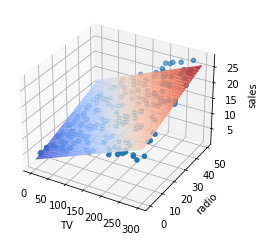

In [16]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# Make data.
X = np.arange(0, 300, 0.5)
Y = np.arange(0, 50, 0.5)
X, Y = np.meshgrid(X, Y)
Z = coef['const'] + coef['TV']*X + coef['radio']*Y

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)

ax.scatter3D(data['TV'], data['radio'], data['sales']);
ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('sales')
plt.show()

In [ ]:
data['Tv*radio'] = data['TV'] * data['radio']
data.head()

,TV,radio,newspaper,sales,Tv*radio
0,230.1,37.8,69.2,22.1,8697.78
1,44.5,39.3,45.1,10.4,1748.85
2,17.2,45.9,69.3,9.3,789.48
3,151.5,41.3,58.5,18.5,6256.95
4,180.8,10.8,58.4,12.9,1952.64


In [ ]:
x_mul = data[['TV','radio', 'Tv*radio']]
x_mul = sm.add_constant(x_mul)
model_mul = sm.OLS(data['sales'], x_mul)
result_mul = model_mul.fit()
print(result_mul.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):          6.68e-146
Time:                        15:37:09   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7502      0.248     27.233      0.0

# Collinearlity

* เกิดจากการที่ predictor อย่างน้อยสองตัว highly correlate กัน

* ปัญหาคือ ทำให้เราไม่สามารถเชื่อมั่นในค่า p-value ได้เนื่องจาก collinearity ทำให้ความแม่นยำในการหา $\hat{\beta}$ ลดลง ซึ่งทำให้ standard error ของ $\hat{\beta}$ เพิ่มขึ้น ส่งผลให้ค่า t-statistic ลดลง ทำให้ p-value ลดลง ส่งผลให้อาจเกิดความผิดพลาดในการ reject hypothesis $H_0$ $\textbf{The probability of correctly detecting a non-zero coefficient is reduced by collinearlity}$
* วิธีการตรวจสอบ \
    1.ดู correlation matrix \
    2.ตรวจสอบค่า VIF (variance inflation factor)
* วิธีการแก้ไข \
    1.drop ตัวแปรนึงทิ้ง อาจทำให้ regression fit ลดลง \
    2.combine ทั้ง 2 variables สร้างเป็น predictor ตัวใหม่

In [73]:
np.random.seed(10)
x1 = np.random.rand(100,1)
x2 = 3*x1+ 0.2*np.random.rand(100,1)
y = 2 + 2*x1 + 3*x2 + np.random.rand(100,1)
x = np.concatenate((x1,x2), axis = 1)
x = sm.add_constant(x)
model = sm.OLS(y, x)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     5004.
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           1.38e-98
Time:                        18:20:07   Log-Likelihood:                -19.903
No. Observations:                 100   AIC:                             45.81
Df Residuals:                      97   BIC:                             53.62
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4905      0.081     30.565      0.0